In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# suite-id
runid='dr407'
# species to plot
pspecies='O3'
# reaction flux index to plot
findex=200
# data directory
datadir='/home/vagrant/cylc-run/u-'+runid+'/runN/work/1/ukca/'

In [3]:
# read-in the species ("tracer") concentrations
datafile=datadir+'tracer_out.csv'

In [4]:
# read the header so know which species are in which column
f=open(datafile, 'r')
# read the first line, not needed here
slist=f.readline()
# need this line as contains the species names
slist=f.readline().split(',')
# remove all leading and trailing blanks
slist=[x.strip() for x in slist]
f.close()

In [5]:
# get index
sindex=slist.index(pspecies)

In [6]:
# read in the data for plotting - comma separated so add delimiter
species=np.loadtxt(datafile, dtype=np.float64, delimiter=',')

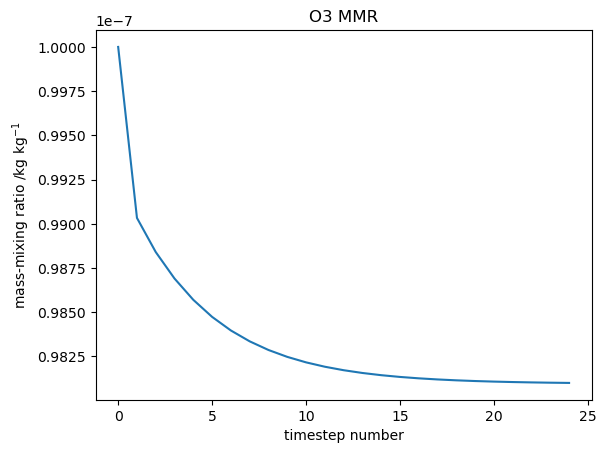

In [7]:
# plot the species of interest
plt.plot(species[:,0],species[:,sindex])
plt.title(pspecies+' MMR')
plt.xlabel('timestep number')
plt.ylabel(r'mass-mixing ratio /kg kg$^{-1}$')
plt.show()

In [8]:
# now read-in reaction fluxes
fluxfile=datadir+'flux_out.csv'

In [9]:
# read the header so know which species are in which column
f=open(fluxfile, 'r')
# read the first & second line, not needed here
flist=f.readline()
flist=f.readline()
# need this line as contains the species names and remove all leading and trailing blanks
# there are up to 2 reactants
flist=f.readline().split(',')
r1=[x.strip() for x in flist]
flist=f.readline().split(',')
r2=[x.strip() for x in flist]
flist=f.readline().split(',')
# and up to 4 products
p1=[x.strip() for x in flist]
flist=f.readline().split(',')
p2=[x.strip() for x in flist]
flist=f.readline().split(',')
p3=[x.strip() for x in flist]
flist=f.readline().split(',')
p4=[x.strip() for x in flist]
f.close()

In [10]:
# read in the fluxes for plotting - comma separated so add delimiter
fluxes=np.loadtxt(fluxfile, dtype=np.float64, delimiter=',')

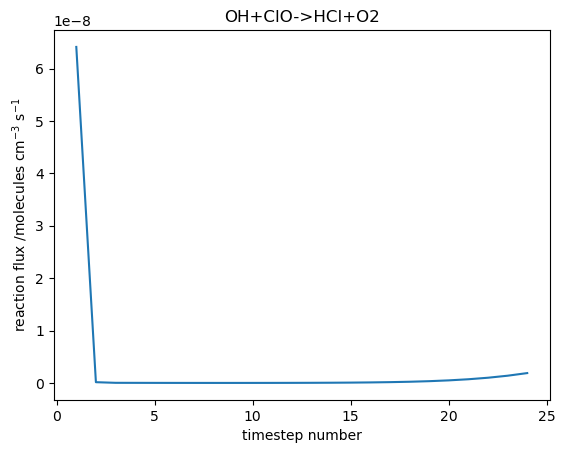

In [11]:
# plot the one of the fluxes
plt.plot(fluxes[:,0],fluxes[:,findex])
ftitle=r1[findex]+' '+r2[findex]+'->'+p1[findex]+' '+p2[findex]+' '+p4[findex]+' '+p4[findex]
# sort out where the + symbols need to be, taking account of the possible 2nd reactant
plt.title(ftitle.strip().replace(' ->','->').replace(' ','+'))
plt.xlabel('timestep number')
plt.ylabel(r'reaction flux /molecules cm$^{-3}$ s$^{-1}$')
plt.show()